In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv("data/agricultural.csv")
df.head()

,farm_id,region,state,agro_zone,crop_type,crop_variety,soil_type,farm_size_ha,soil_pH,soil_nitrogen,...,fertilizer_amount_kg_ha,irrigation_type,pest_type,pest_severity,rainfall_variability,temperature_stress,extreme_weather,labor_input,soil_degradation,yield_kg_ha
0,FARM_000001,Southsouth,Rivers,Humid Forest,Pepper,Nsukka Yellow,Lateritic,0.9,6.5,17.5,...,108.7,NaN,Whiteflies,Moderate,Normal,NaN,NaN,Medium,NaN,5724.0
1,FARM_000002,Northeast,Gombe,Sudan Savanna,Beans,IT89KD-288,Sandy,2.2,7.3,21.8,...,112.3,Surface,Pod Borers,Low,Erratic,Moderate,NaN,Low,NaN,1817.0
2,FARM_000003,Northwest,Jigawa,Sudan Savanna,Sorghum,Local Kaura,Loamy,2.9,5.0,24.1,...,130.8,Surface,Aphids,Low,Erratic,Moderate,Drought,Low,NaN,1178.0
3,FARM_000004,Northcentral,Benue,Northern Guinea Savanna,Maize,Local White,Clayey,0.5,5.1,23.4,...,89.7,Drip,Pod Borers,Low,Normal,NaN,NaN,High,Moderate,2775.0
4,FARM_000005,Southwest,Osun,Humid Forest,Yam,D. alata,Loamy,4.6,6.7,18.4,...,NaN,NaN,Stem Borers,Low,Normal,NaN,Flood,Medium,Moderate,6517.0


In [4]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   farm_id                  20000 non-null  object 
 1   region                   20000 non-null  object 
 2   state                    20000 non-null  object 
 3   agro_zone                20000 non-null  object 
 4   crop_type                20000 non-null  object 
 5   crop_variety             20000 non-null  object 
 6   soil_type                20000 non-null  object 
 7   farm_size_ha             19399 non-null  float64
 8   soil_pH                  20000 non-null  float64
 9   soil_nitrogen            19385 non-null  float64
 10  soil_phosphorus          19433 non-null  float64
 11  soil_potassium           19364 non-null  float64
 12  rainfall_mm              20000 non-null  float64
 13  temperature_C            20000 non-null  float64
 14  fertilizer_type       

In [5]:
#checking the descriptive statistic
df.describe()

,farm_size_ha,soil_pH,soil_nitrogen,soil_phosphorus,soil_potassium,rainfall_mm,temperature_C,fertilizer_amount_kg_ha,yield_kg_ha
count,19399.000000,20000.000000,19385.000000,19433.000000,19364.000000,20000.000000,20000.000000,19360.000000,20000.000000
mean,1.473921,6.249345,30.069745,17.431236,124.857085,1253.514430,27.026240,99.981338,4984.284050
std,1.236371,0.740353,11.835487,7.435623,44.460422,417.703382,2.964489,59.404158,4098.661553
min,0.500000,5.000000,10.000000,5.000000,50.000000,600.000000,22.000000,0.000000,500.000000
25%,0.600000,5.600000,20.100000,11.100000,87.200000,897.975000,24.500000,49.300000,1578.000000
50%,1.100000,6.300000,30.200000,17.500000,125.100000,1236.600000,27.100000,100.750000,3820.500000
75%,1.900000,6.900000,40.000000,23.700000,162.100000,1588.000000,29.500000,150.300000,7499.000000
max,10.000000,7.500000,50.000000,30.000000,200.000000,2000.000000,32.000000,200.000000,25000.000000


In [6]:
#checking for the missing values
df.isnull().sum()

farm_id                        0
region                         0
state                          0
agro_zone                      0
crop_type                      0
crop_variety                   0
soil_type                      0
farm_size_ha                 601
soil_pH                        0
soil_nitrogen                615
soil_phosphorus              567
soil_potassium               636
rainfall_mm                    0
temperature_C                  0
fertilizer_type             5934
fertilizer_amount_kg_ha      640
irrigation_type            14300
pest_type                      0
pest_severity                  0
rainfall_variability           0
temperature_stress         11465
extreme_weather            11550
labor_input                    0
soil_degradation            9248
yield_kg_ha                    0
dtype: int64

In [7]:
#cleaning the missing column with fillna
df["irrigation_type"] = df['irrigation_type'].fillna(df['irrigation_type'].mode()[0])
df["temperature_stress"] = df['temperature_stress'].fillna(df['temperature_stress'].mode()[0])
df["extreme_weather"] = df['extreme_weather'].fillna(df['extreme_weather'].mode()[0])
df["soil_degradation"] = df['soil_degradation'].fillna(df['soil_degradation'].mode()[0])
df["fertilizer_type"] = df['fertilizer_type'].fillna(df['fertilizer_type'].mode()[0])
df['irrigation_type'].isnull().sum()
df.isnull().sum()

farm_id                      0
region                       0
state                        0
agro_zone                    0
crop_type                    0
crop_variety                 0
soil_type                    0
farm_size_ha               601
soil_pH                      0
soil_nitrogen              615
soil_phosphorus            567
soil_potassium             636
rainfall_mm                  0
temperature_C                0
fertilizer_type              0
fertilizer_amount_kg_ha    640
irrigation_type              0
pest_type                    0
pest_severity                0
rainfall_variability         0
temperature_stress           0
extreme_weather              0
labor_input                  0
soil_degradation             0
yield_kg_ha                  0
dtype: int64

In [8]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

farm_id                    0
region                     0
state                      0
agro_zone                  0
crop_type                  0
crop_variety               0
soil_type                  0
farm_size_ha               0
soil_pH                    0
soil_nitrogen              0
soil_phosphorus            0
soil_potassium             0
rainfall_mm                0
temperature_C              0
fertilizer_type            0
fertilizer_amount_kg_ha    0
irrigation_type            0
pest_type                  0
pest_severity              0
rainfall_variability       0
temperature_stress         0
extreme_weather            0
labor_input                0
soil_degradation           0
yield_kg_ha                0
dtype: int64

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17131 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   farm_id                  17131 non-null  object 
 1   region                   17131 non-null  object 
 2   state                    17131 non-null  object 
 3   agro_zone                17131 non-null  object 
 4   crop_type                17131 non-null  object 
 5   crop_variety             17131 non-null  object 
 6   soil_type                17131 non-null  object 
 7   farm_size_ha             17131 non-null  float64
 8   soil_pH                  17131 non-null  float64
 9   soil_nitrogen            17131 non-null  float64
 10  soil_phosphorus          17131 non-null  float64
 11  soil_potassium           17131 non-null  float64
 12  rainfall_mm              17131 non-null  float64
 13  temperature_C            17131 non-null  float64
 14  fertilizer_type          17

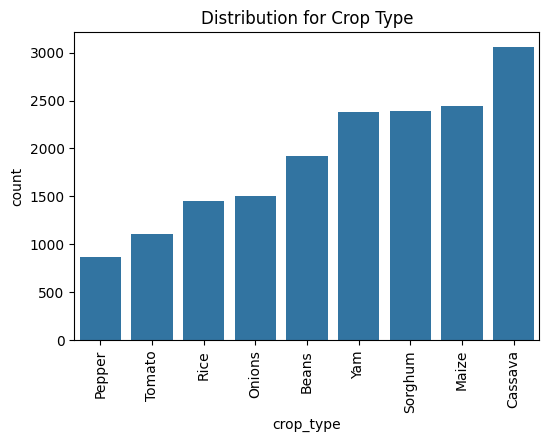

In [10]:
#Distribution of categorical data for crop_type
plt.figure(figsize=(6, 4))
sns.countplot(x="crop_type", data=df_cleaned, order=df_cleaned['crop_type'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title("Distribution for Crop Type")
plt.show()

In [11]:
print(df_cleaned['crop_type'].value_counts())

crop_type
Cassava    3061
Maize      2444
Sorghum    2389
Yam        2377
Beans      1924
Onions     1501
Rice       1456
Tomato     1110
Pepper      869
Name: count, dtype: int64


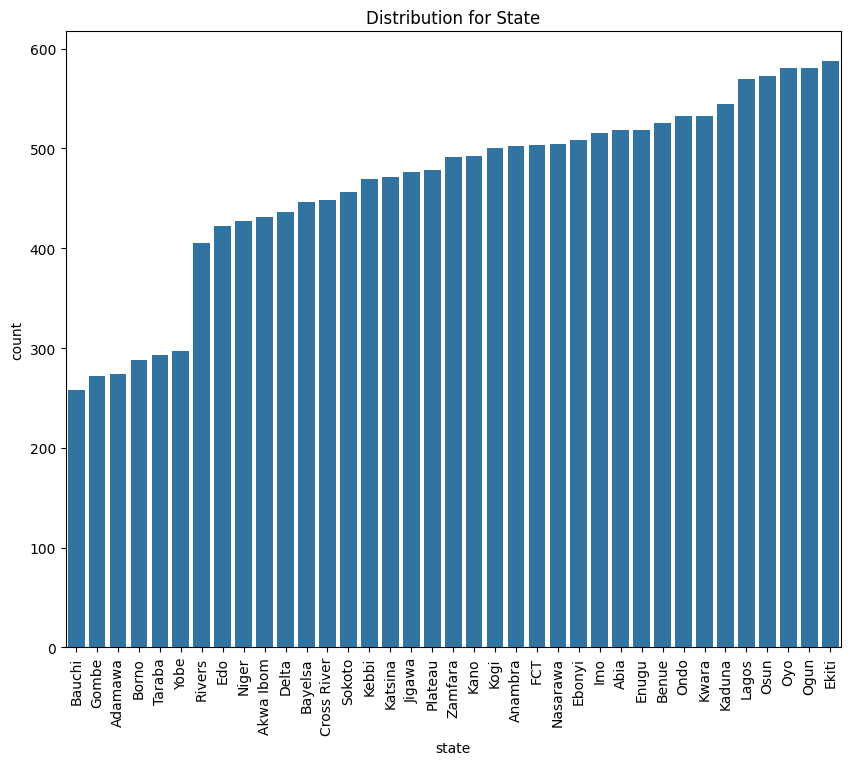

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x="state", data=df_cleaned, order=df_cleaned['state'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title("Distribution for State")
plt.show()

In [13]:
print(df_cleaned['state'].value_counts())

state
Ekiti          588
Ogun           581
Oyo            581
Osun           573
Lagos          570
Kaduna         545
Ondo           533
Kwara          533
Benue          526
Enugu          519
Abia           519
Imo            516
Ebonyi         508
Nasarawa       504
FCT            503
Anambra        502
Kogi           500
Kano           492
Zamfara        491
Plateau        478
Jigawa         476
Katsina        471
Kebbi          469
Sokoto         456
Cross River    448
Bayelsa        446
Delta          436
Akwa Ibom      431
Niger          427
Edo            422
Rivers         405
Yobe           297
Taraba         293
Borno          288
Adamawa        274
Gombe          272
Bauchi         258
Name: count, dtype: int64


In [14]:
state_yield = df_cleaned.groupby('state')['yield_kg_ha'].mean().sort_values(ascending=False)
print(state_yield)

state
Ebonyi         6976.980315
Enugu          6721.701349
Abia           6640.554913
Lagos          6577.559649
Delta          6532.651376
Rivers         6514.612346
Akwa Ibom      6492.995360
Cross River    6483.299107
Edo            6468.393365
Osun           6367.253054
Ondo           6361.540338
Ekiti          6360.280612
Anambra        6358.071713
Ogun           6346.654045
Imo            6306.856589
Bayelsa        6238.325112
Oyo            5642.555938
Kogi           5254.352000
Taraba         4161.201365
Niger          4094.908665
Kwara          4077.883677
Benue          4040.986692
FCT            3985.161034
Nasarawa       3930.799603
Plateau        3705.307531
Jigawa         3307.392857
Gombe          3251.110294
Katsina        3205.643312
Kaduna         3181.788991
Bauchi         3086.201550
Borno          3049.791667
Kebbi          3034.434968
Zamfara        2992.568228
Sokoto         2985.133772
Kano           2969.089431
Adamawa        2866.715328
Yobe           2858.74

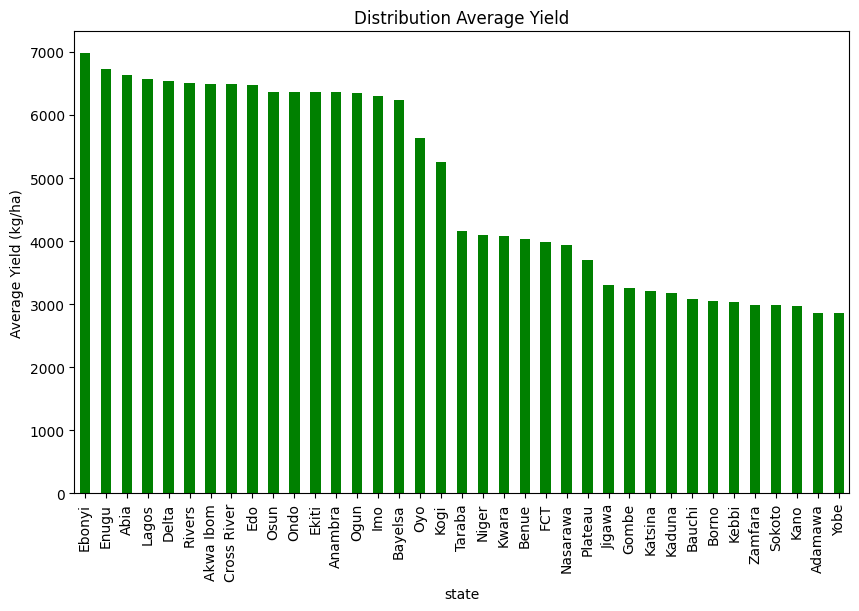

In [15]:
plt.figure(figsize=(10, 6))
state_yield.plot(kind='bar', color='green')
plt.ylabel('Average Yield (kg/ha)')
plt.title("Distribution Average Yield")
plt.show()

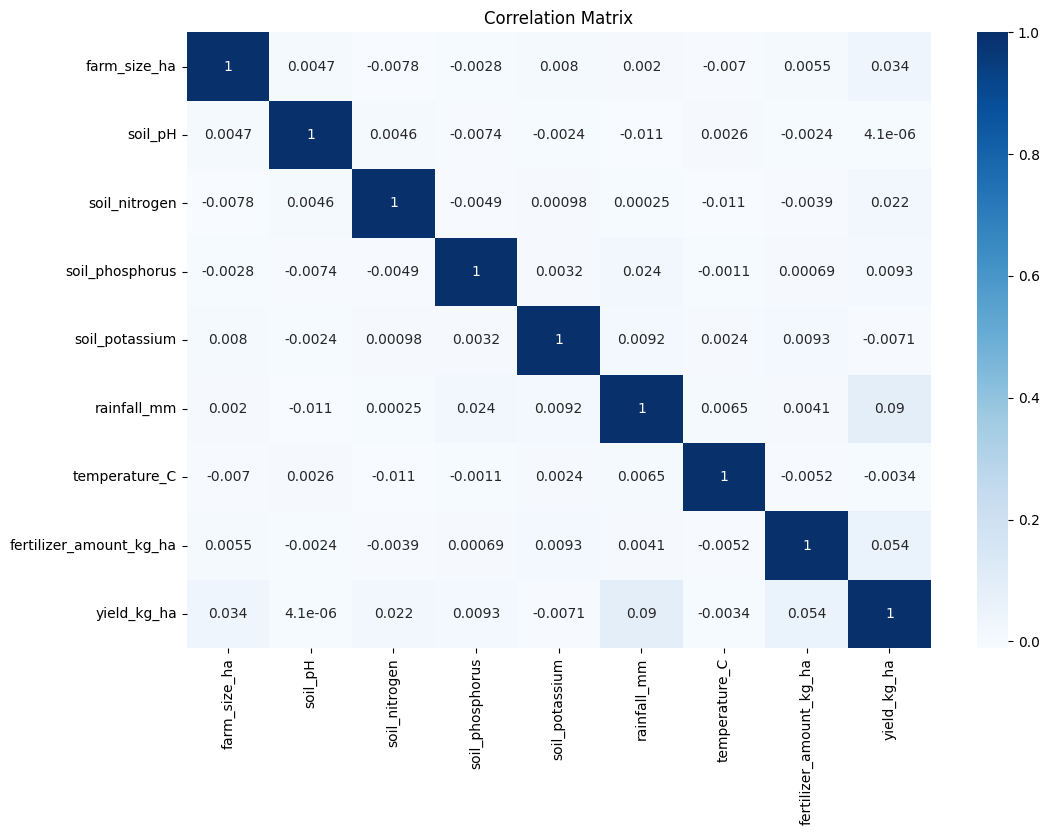

In [16]:
#correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

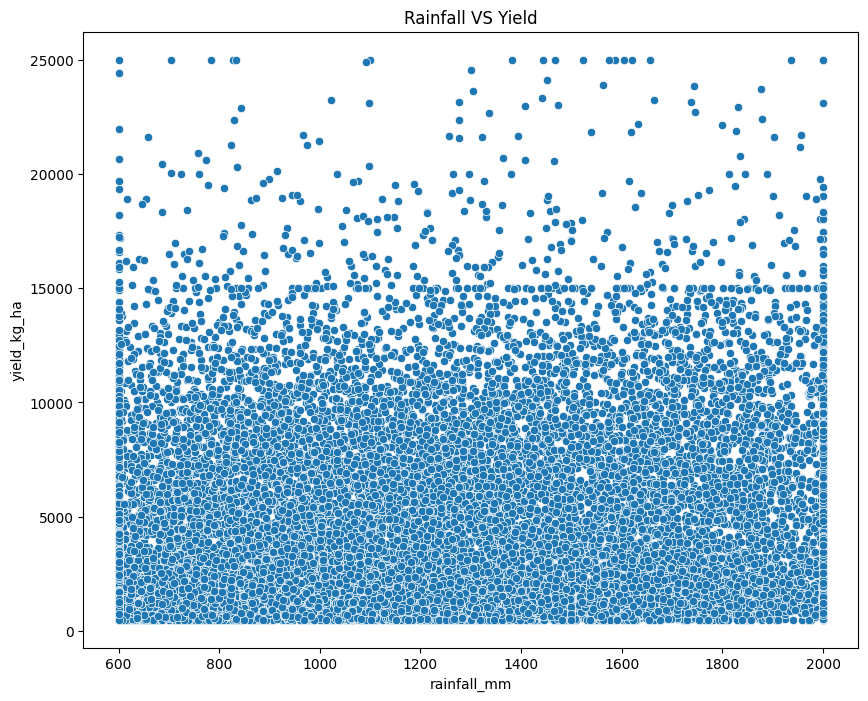

In [17]:
#scatter plot distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x='rainfall_mm', y='yield_kg_ha', data=df_cleaned)
plt.title("Rainfall VS Yield")
plt.show()

In [18]:
#soil analysis by yield
soil_type_yeild = df_cleaned.groupby("soil_type")['yield_kg_ha'].mean().sort_values(ascending=False)
soil_type_yeild

soil_type
Lateritic    5715.968007
Clayey       5426.547635
Loamy        4861.397979
Sandy        4090.911560
Name: yield_kg_ha, dtype: float64

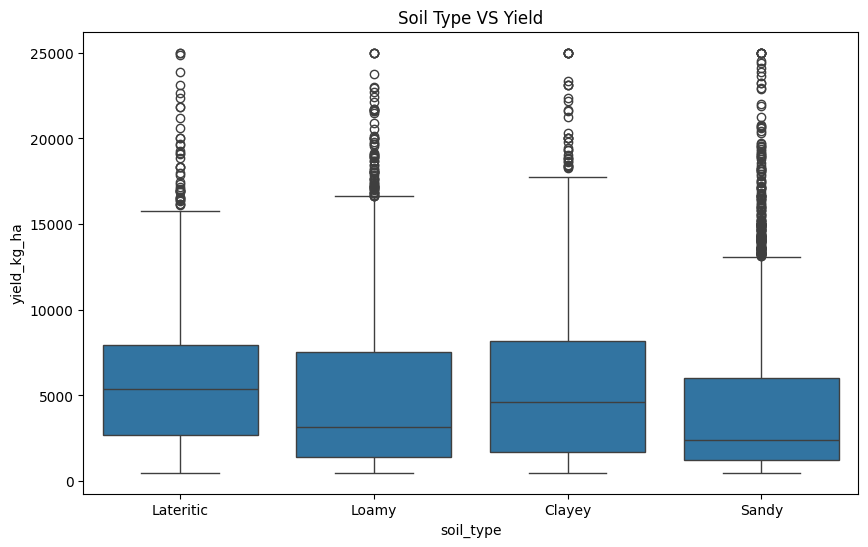

In [19]:
#boxplot relationship of soil_type and yeild_kg_ha
plt.figure(figsize=(10, 6))
sns.boxplot(x="soil_type", y="yield_kg_ha", data=df_cleaned)
plt.title("Soil Type VS Yield")
plt.show()

In [20]:
#fertilizer effectivenes 
fertilizer_yeild = df_cleaned.groupby("fertilizer_type")['yield_kg_ha'].mean().sort_values(ascending=False)
fertilizer_yeild

fertilizer_type
Organic    5071.149093
NPK        4993.198235
Urea       4957.978244
Name: yield_kg_ha, dtype: float64

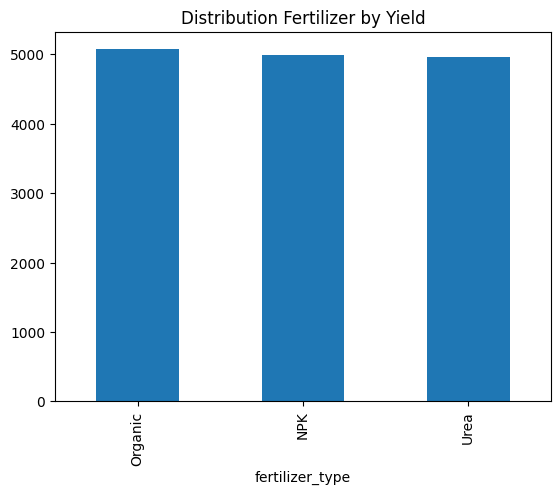

In [21]:
# plt.figure(figsize=(10, 6))
fertilizer_yeild.plot(kind="bar")
plt.title("Distribution Fertilizer by Yield")
plt.show()

In [22]:
df_cleaned.to_csv("crop_production_cleaned_data.csv", index=False)

In [23]:
# df_cleaned = df_cleaned.drop("farm_id", axis=1)
# df_cleaned.info()

In [24]:
# df_cleaned.to_csv("agricultural_cleaned_data.csv", index=False)